In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'people-tracking:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3433049%2F6202256%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240321%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240321T193459Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D01fe68e824931a5245b685b50955da5d3bb3fa13aebacb10a210699a84d7afb7f5416ecdc00c673d104fcaf07ece2d0cdef4363f74a67de286cfa0204ac5c57bf83b5e97b3a7c65e2a01054b542c95d80d60d49fe473b5a1f045e2134f0a64d3f8fa3d9bf834764a9b918bbca4d36622d979e7be685a801238db6705f90392c4b0079a63dda0b97102b02aef20888e05c414b08ad1cfb5c4cbd98083e6b31fea3bf3b7f22e19f3ce9ad081f2e82c72aac53fc83dbbc014d514a3b3838ee1ef869d4dab2150e1fd48b827ca316dbced98605a90177316b689ac288b60f741e00b40842b5900898ff9e8e8d3656eaf5291d79a517356e3a32a5f804d87e4304f13'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 46156442 bytes downloaded
Downloaded and uncompressed: people-tracking
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/people-tracking/annotations.xml
/kaggle/input/people-tracking/images/frame_000022.PNG
/kaggle/input/people-tracking/images/frame_000033.PNG
/kaggle/input/people-tracking/images/frame_000032.PNG
/kaggle/input/people-tracking/images/frame_000006.PNG
/kaggle/input/people-tracking/images/frame_000016.PNG
/kaggle/input/people-tracking/images/frame_000029.PNG
/kaggle/input/people-tracking/images/frame_000008.PNG
/kaggle/input/people-tracking/images/frame_000014.PNG
/kaggle/input/people-tracking/images/frame_000034.PNG
/kaggle/input/people-tracking/images/frame_000035.PNG
/kaggle/input/people-tracking/images/frame_000000.PNG
/kaggle/input/people-tracking/images/frame_000025.PNG
/kaggle/input/people-tracking/images/frame_000001.PNG
/kaggle/input/people-tracking/images/frame_000010.PNG
/kaggle/input/people-tracking/images/frame_000018.PNG
/kaggle/input/people-tracking/images/frame_000040.PNG
/kaggle/input/people-tracking/images/frame_000037.PNG
/kaggle/input/people-tracking/images

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.0/722.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from ultralytics import YOLOWorld

model = YOLOWorld('yolov8s-world.pt')

model.set_classes(["person"])


100%|██████████| 25.9M/25.9M [00:00<00:00, 49.5MB/s]


requirements: Ultralytics requirement ['git+https://github.com/openai/CLIP.git'] not found, attempting AutoUpdate...
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-smaac8lj
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.0 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=bcd26e0bd5992b80c7b3acbff36c2315e0730287939476569d6964647559e9af
  Stored in directory: /tmp/pip-ephem-wheel-cache-os1pggfg/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip

requirements: AutoUpdate success ✅ 11.2s, installed 1 package: ['git+https://github.com/openai/CLIP.git']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 149MiB/s]


In [ ]:
results = model.predict('https://meritlead.pl/wp-content/uploads/2018/09/Galeria-Dominikanska-5-800px.jpg')

results[0].show()

100%|██████████| 130k/130k [00:00<00:00, 185kB/s]


image 1/1 /content/Galeria-Dominikanska-5-800px.jpg: 384x640 10 persons, 852.2ms
Speed: 22.4ms preprocess, 852.2ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)


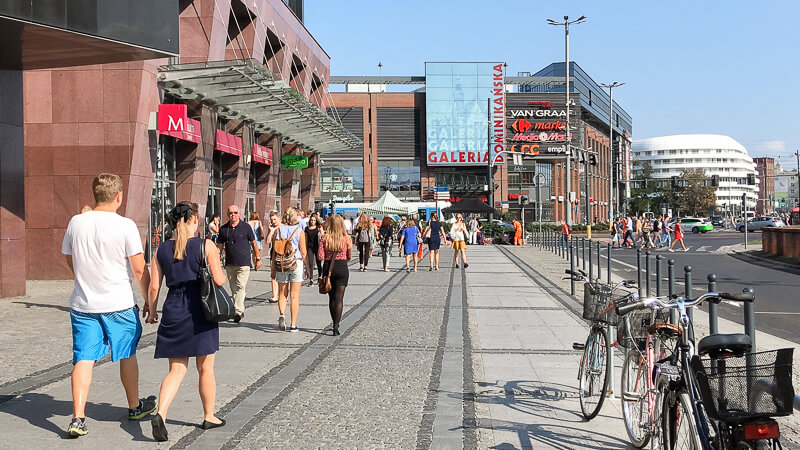

In [ ]:
import cv2
from PIL import Image
Image.open("/content/Galeria-Dominikanska-5-800px.jpg")

In [ ]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    result.save(filename='result1.jpg')  # save to disk

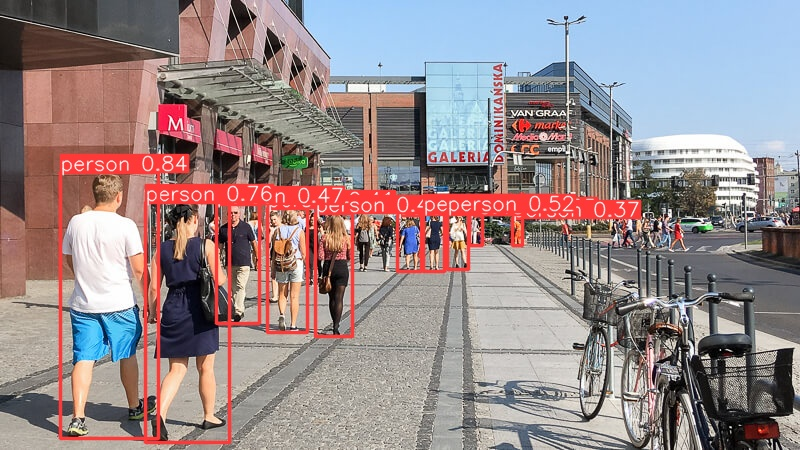

In [ ]:
Image.open("/content/result1.jpg")

# test

In [ ]:
import random
import matplotlib.pyplot as plt



0: 384x640 39 persons, 897.4ms
Speed: 4.0ms preprocess, 897.4ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 41 persons, 531.0ms
Speed: 2.8ms preprocess, 531.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 44 persons, 387.5ms
Speed: 7.0ms preprocess, 387.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 593.9ms
Speed: 3.6ms preprocess, 593.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 40 persons, 591.4ms
Speed: 2.7ms preprocess, 591.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 40 persons, 592.7ms
Speed: 2.7ms preprocess, 592.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 39 persons, 577.9ms
Speed: 2.6ms preprocess, 577.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 40 persons, 371.7ms
Speed: 2.5ms preprocess, 371.7ms inference, 1.1ms postproc

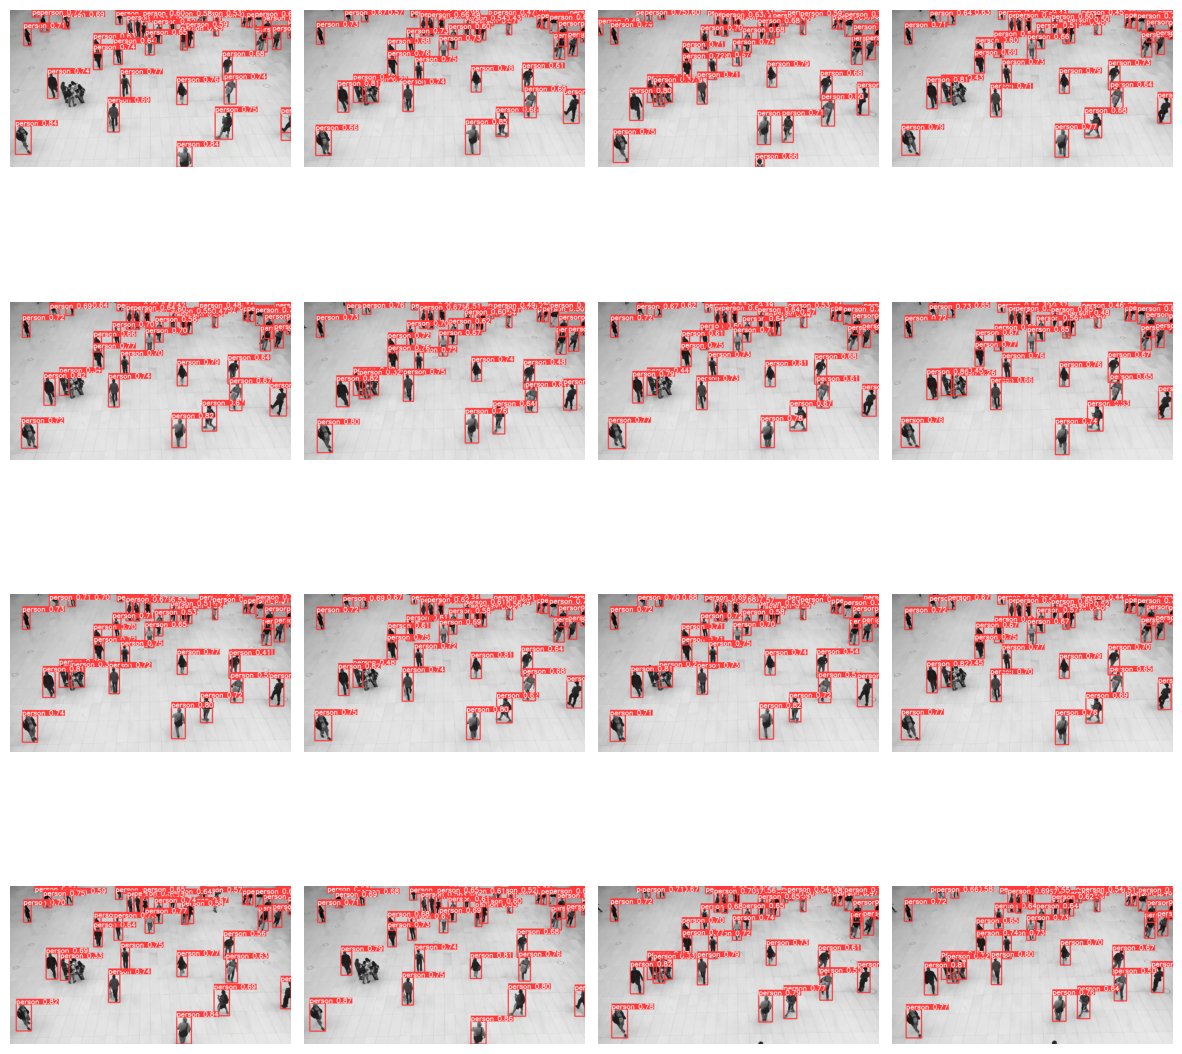

In [ ]:
def img_detect(img_path):

    img = cv2.imread(img_path)
    detect_result = model(img)

    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


custom_image_dir = "/kaggle/input/people-tracking/images"

image_files = os.listdir(custom_image_dir)

selected_images = random.sample(image_files, 16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):

    row_idx = i // 4
    col_idx = i % 4

    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = img_detect(img_path)

    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)